## phytoplankton fractions as a function of total Chl a (Hirata et al., 2011)

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from glob import glob
from collections import OrderedDict
import xarray as xr
import numpy as np
import esmlab
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import pop_tools
from scipy import stats
from cartopy.util import add_cyclic_point
from IPython.display import Image

Cannot write to data cache folder '/glade/p/cesmdata/cseg'. Will not be able to download remote data files. Use environment variable 'CESMDATAROOT' to specify another directory.


### Define latest year and get the CESM data

In [2]:
start_yr = 59
num_years = 3
endyr = start_yr + num_years 
case = 'g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.004'
user = 'kristenk'

In [3]:
files = []
for year in range(start_yr,endyr):
    yr4="{:04d}".format(year)
    print('doing simulation year', year, '!')
    for month in range(1, 13):
    
        mo2="{:02d}".format(month)
        files.extend(sorted(glob(f'/glade/scratch/{user}/archive/{case}/ocn/hist/{case}.pop.h.{yr4}-{mo2}.nc')))
        #files.extend(sorted(glob(f'/glade/scratch/{user}/{case}/run/{case}.pop.h.{yr4}-{mo2}.nc')))

doing simulation year 59 !
doing simulation year 60 !
doing simulation year 61 !


In [4]:
cesm_mon_ds=xr.open_mfdataset(files,decode_times=False,decode_coords=False, concat_dim='time')

### Keep only the variables we need

In [5]:
variables = ['spChl','diazChl','coccoChl','diatChl',
             'diatC', 'coccoC','spC','diazC',
             'zoo1C','zoo2C','zoo3C','zoo4C']
coords = {'x':'TLONG','y':'TLAT'}

In [6]:
keepthese=['z_t','z_t_150m','time_bound','TAREA','REGION_MASK'] + variables
keep_vars = keepthese +list(coords.values())+['dz','KMT']
cesm_mon_ds = cesm_mon_ds.drop([v for v in cesm_mon_ds.variables if v not in keep_vars])

In [7]:
ds=cesm_mon_ds.mean(dim='time')

In [8]:
ds_grid = pop_tools.get_grid('POP_gx1v7')

lons=ds_grid.TLONG
lats=ds_grid.TLAT
area=ds_grid.TAREA
depths=ds_grid.z_t * 0.01
area_m=area * 1.e-4
dz_m=ds_grid.dz * 0.01

In [9]:
ds

<xarray.Dataset>
Dimensions:      (d2: 2, nlat: 384, nlon: 320, z_t: 60, z_t_150m: 15)
Coordinates:
  * z_t_150m     (z_t_150m) float32 500.0 1500.0 2500.0 ... 13500.0 14500.0
  * z_t          (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound   (d2) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    dz           (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    TLONG        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    KMT          (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    REGION_MASK  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TAREA        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    zoo1C        (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    zoo2C        (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    zoo3C        (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    zoo4C        (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    spChl        (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    spC          (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    diatChl      (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    diatC        (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    diazChl      (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    diazC        (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    coccoChl     (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
    coccoC       (z_t_150m, nlat, nlon) float32 dask.array<chunksize=(15, 384, 320), meta=np.ndarray>
Attributes:
    title:             g.e22a06.G1850ECOIAF_JRA_PHYS_DEV.TL319_g17.4p4z.004
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2021-02-26 at 08:16:06.0
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

In [10]:
ds['TOT_chl'] = ds.spChl + ds.coccoChl + ds.diatChl + ds.diazChl
ds['TOT_phytoC'] = ds.spC + ds.coccoC + ds.diatC + ds.diazC
ds['TOT_zooC'] = ds.zoo1C + ds.zoo2C + ds.zoo3C + ds.zoo4C

#### flatten arrays and remove nans

In [11]:
tot_chl_vals = ds.TOT_chl.isel(z_t_150m=0).values
tot_chl_vals = tot_chl_vals.flatten()
tot_chl_vals = tot_chl_vals[~np.isnan(tot_chl_vals)]

In [12]:
spChl_vals = ds.spChl.isel(z_t_150m=0).values
spChl_vals = spChl_vals.flatten()
spChl_vals = spChl_vals[~np.isnan(spChl_vals)]
spChl_percent = spChl_vals/tot_chl_vals * 100.

diatChl_vals = ds.diatChl.isel(z_t_150m=0).values
diatChl_vals = diatChl_vals.flatten()
diatChl_vals = diatChl_vals[~np.isnan(diatChl_vals)]
diatChl_percent = diatChl_vals/tot_chl_vals * 100.

diazChl_vals = ds.diazChl.isel(z_t_150m=0).values
diazChl_vals = diazChl_vals.flatten()
diazChl_vals = diazChl_vals[~np.isnan(diazChl_vals)]
diazChl_percent = diazChl_vals/tot_chl_vals * 100.

coccoChl_vals = ds.coccoChl.isel(z_t_150m=0).values
coccoChl_vals = coccoChl_vals.flatten()
coccoChl_vals = coccoChl_vals[~np.isnan(coccoChl_vals)]
coccoChl_percent = coccoChl_vals/tot_chl_vals * 100.

In [13]:
tot_chl_vals.min()

0.007453752

In [14]:
tot_chl_vals.max()

10.2297125

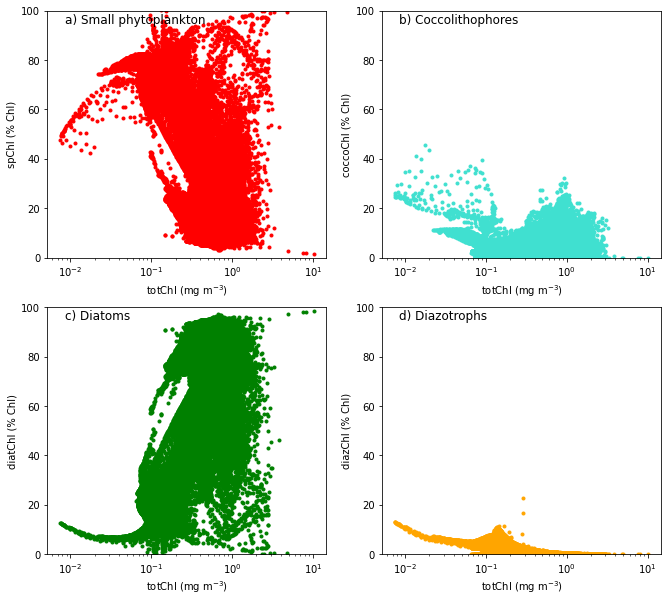

In [15]:
fig = plt.figure(figsize=(11,10))

ax = fig.add_subplot(2,2,1)
#plt.title('spChl vs total Chl')
ax.set_xlabel('totChl (mg m$^{-3}$)')
ax.set_ylabel('spChl (% Chl)')
ax.scatter(tot_chl_vals, spChl_percent, color='red',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.0085, 95, 'a) Small phytoplankton',fontsize=12)

ax = fig.add_subplot(2,2,2)
#plt.title('coccoChl vs total Chl')
ax.set_xlabel('totChl (mg m$^{-3}$)')
ax.set_ylabel('coccoChl (% Chl)')
ax.scatter(tot_chl_vals, coccoChl_percent, color='turquoise',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.0085, 95, 'b) Coccolithophores',fontsize=12)

ax = fig.add_subplot(2,2,3)
#plt.title('diatChl vs total Chl')
ax.set_xlabel('totChl (mg m$^{-3}$)')
ax.set_ylabel('diatChl (% Chl)')
ax.scatter(tot_chl_vals, diatChl_percent, color='green',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.0085, 95, 'c) Diatoms',fontsize=12)

ax = fig.add_subplot(2,2,4)
#plt.title('diazChl vs total Chl')
ax.set_xlabel('totChl (mg m$^{-3}$)')
ax.set_ylabel('diazChl (% Chl)')
ax.scatter(tot_chl_vals, diazChl_percent, color='orange',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.0085, 95, 'd) Diazotrophs',fontsize=12);

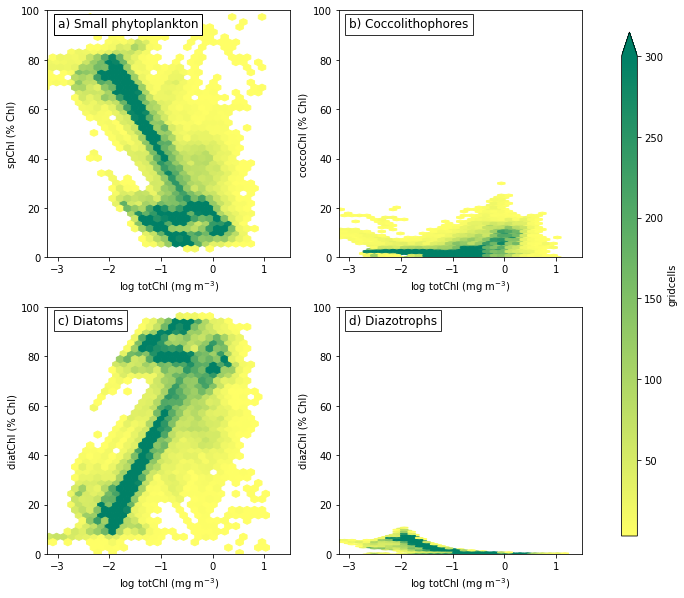

In [17]:
fig = plt.figure(figsize=(11,10))
maxval=300
cmap='summer_r'
ax = fig.add_subplot(2,2,1)
#plt.title('spChl vs total Chl')
ax.set_xlabel('log totChl (mg m$^{-3}$)')
ax.set_ylabel('spChl (% Chl)')
h = ax.hexbin(np.log(tot_chl_vals), spChl_percent, mincnt=3, vmax=maxval, gridsize=50, cmap=cmap)
ax.set_ylim(0,100)
ax.set_xlim(-3.2,1.5)
t = ax.text(-3, 93, 'a) Small phytoplankton',fontsize=12,color='black')
t.set_bbox(dict(facecolor='white', alpha=0.8))

ax = fig.add_subplot(2,2,2)
#plt.title('coccoChl vs total Chl')
ax.set_xlabel('log totChl (mg m$^{-3}$)')
ax.set_ylabel('coccoChl (% Chl)')
ax.hexbin(np.log(tot_chl_vals),coccoChl_percent, mincnt=3, vmax=maxval, gridsize=50, cmap=cmap)
ax.set_ylim(0,100)
ax.set_xlim(-3.2,1.5)
t = ax.text(-3, 93, 'b) Coccolithophores',fontsize=12,color='black')
t.set_bbox(dict(facecolor='white', alpha=0.8))
ax = fig.add_subplot(2,2,3)
#plt.title('diatChl vs total Chl')
ax.set_xlabel('log totChl (mg m$^{-3}$)')
ax.set_ylabel('diatChl (% Chl)')
ax.hexbin(np.log(tot_chl_vals), diatChl_percent, mincnt=3, vmax=maxval, gridsize=50, cmap=cmap)
ax.set_ylim(0,100)
ax.set_xlim(-3.2,1.5)
t = ax.text(-3, 93, 'c) Diatoms',fontsize=12,color='black')
t.set_bbox(dict(facecolor='white', alpha=0.8))

ax = fig.add_subplot(2,2,4)
#plt.title('diazChl vs total Chl')
ax.set_xlabel('log totChl (mg m$^{-3}$)')
ax.set_ylabel('diazChl (% Chl)')
ax.hexbin(np.log(tot_chl_vals), diazChl_percent, mincnt=3, vmax=maxval, gridsize=50, cmap=cmap)
ax.set_ylim(0,100)
ax.set_xlim(-3.2,1.5)
t = ax.text(-3, 93, 'd) Diazotrophs',fontsize=12,color='black')
t.set_bbox(dict(facecolor='white', alpha=0.8))


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(h, cax=cbar_ax,extend='max',label='gridcells');

#### how about biomasses as a function of total phytoplankton biomass

In [17]:
tot_phyto_vals = ds.TOT_phytoC.isel(z_t_150m=0).values
tot_phyto_vals = tot_phyto_vals.flatten()
tot_phyto_vals = tot_phyto_vals[~np.isnan(tot_phyto_vals)]

In [18]:
spC_vals = ds.spC.isel(z_t_150m=0).values
spC_vals = spC_vals.flatten()
spC_vals = spC_vals[~np.isnan(spC_vals)]
spC_percent = spC_vals/tot_phyto_vals * 100.

diatC_vals = ds.diatC.isel(z_t_150m=0).values
diatC_vals = diatC_vals.flatten()
diatC_vals = diatC_vals[~np.isnan(diatC_vals)]
diatC_percent = diatC_vals/tot_phyto_vals * 100.

diazC_vals = ds.diazC.isel(z_t_150m=0).values
diazC_vals = diazC_vals.flatten()
diazC_vals = diazC_vals[~np.isnan(diazC_vals)]
diazC_percent = diazC_vals/tot_phyto_vals * 100.

coccoC_vals = ds.coccoC.isel(z_t_150m=0).values
coccoC_vals = coccoC_vals.flatten()
coccoC_vals = coccoC_vals[~np.isnan(coccoC_vals)]
coccoC_percent = coccoC_vals/tot_phyto_vals * 100.

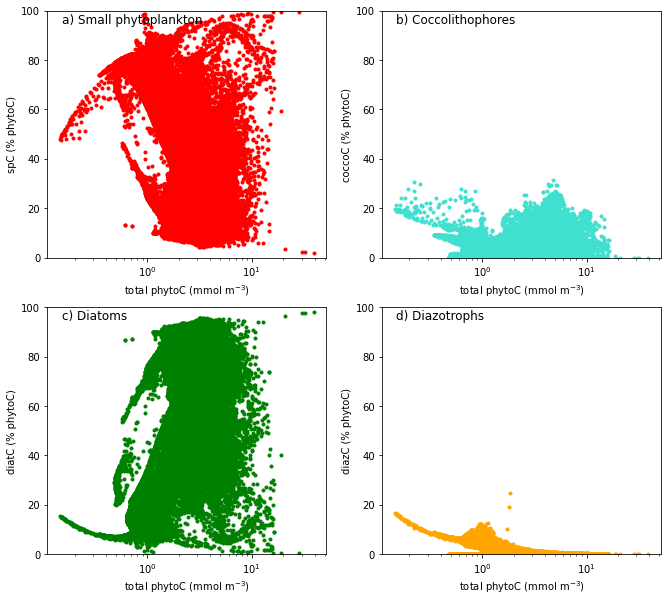

In [19]:
fig = plt.figure(figsize=(11,10))

ax = fig.add_subplot(2,2,1)
#plt.title('spChl vs total Chl')
ax.set_xlabel('total phytoC (mmol m$^{-3}$)')
ax.set_ylabel('spC (% phytoC)')
ax.scatter(tot_phyto_vals, spC_percent, color='red',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'a) Small phytoplankton',fontsize=12)

ax = fig.add_subplot(2,2,2)
#plt.title('coccoChl vs total Chl')
ax.set_xlabel('total phytoC (mmol m$^{-3}$)')
ax.set_ylabel('coccoC (% phytoC)')
ax.scatter(tot_phyto_vals, coccoC_percent, color='turquoise',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'b) Coccolithophores',fontsize=12)

ax = fig.add_subplot(2,2,3)
#plt.title('diatChl vs total Chl')
ax.set_xlabel('total phytoC (mmol m$^{-3}$)')
ax.set_ylabel('diatC (% phytoC)')
ax.scatter(tot_phyto_vals, diatC_percent, color='green',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'c) Diatoms',fontsize=12)

ax = fig.add_subplot(2,2,4)
#plt.title('diazChl vs total Chl')
ax.set_xlabel('total phytoC (mmol m$^{-3}$)')
ax.set_ylabel('diazC (% phytoC)')
ax.scatter(tot_phyto_vals, diazC_percent, color='orange',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'd) Diazotrophs',fontsize=12);

In [20]:
tot_zoo_vals = ds.TOT_zooC.isel(z_t_150m=0).values
tot_zoo_vals = tot_zoo_vals.flatten()
tot_zoo_vals = tot_zoo_vals[~np.isnan(tot_zoo_vals)]

In [21]:
zoo1C_vals = ds.zoo1C.isel(z_t_150m=0).values
zoo1C_vals = zoo1C_vals.flatten()
zoo1C_vals = zoo1C_vals[~np.isnan(zoo1C_vals)]
zoo1C_percent = zoo1C_vals/tot_zoo_vals * 100.

zoo2C_vals = ds.zoo2C.isel(z_t_150m=0).values
zoo2C_vals = zoo2C_vals.flatten()
zoo2C_vals = zoo2C_vals[~np.isnan(zoo2C_vals)]
zoo2C_percent = zoo2C_vals/tot_zoo_vals * 100.

zoo3C_vals = ds.zoo3C.isel(z_t_150m=0).values
zoo3C_vals = zoo3C_vals.flatten()
zoo3C_vals = zoo3C_vals[~np.isnan(zoo3C_vals)]
zoo3C_percent = zoo3C_vals/tot_zoo_vals * 100.

zoo4C_vals = ds.zoo4C.isel(z_t_150m=0).values
zoo4C_vals = zoo4C_vals.flatten()
zoo4C_vals = zoo4C_vals[~np.isnan(zoo4C_vals)]
zoo4C_percent = zoo4C_vals/tot_zoo_vals * 100.

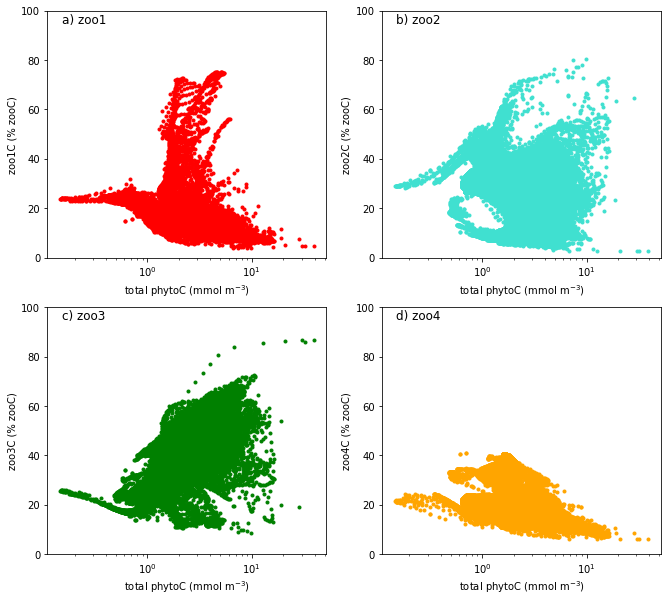

In [22]:
fig = plt.figure(figsize=(11,10))

ax = fig.add_subplot(2,2,1)
#plt.title('spChl vs total Chl')
ax.set_xlabel('total phytoC (mmol m$^{-3}$)')
ax.set_ylabel('zoo1C (% zooC)')
ax.scatter(tot_phyto_vals, zoo1C_percent, color='red',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'a) zoo1',fontsize=12)

ax = fig.add_subplot(2,2,2)
#plt.title('coccoChl vs total Chl')
ax.set_xlabel('total phytoC (mmol m$^{-3}$)')
ax.set_ylabel('zoo2C (% zooC)')
ax.scatter(tot_phyto_vals, zoo2C_percent, color='turquoise',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'b) zoo2',fontsize=12)

ax = fig.add_subplot(2,2,3)
#plt.title('diatChl vs total Chl')
ax.set_xlabel('total phytoC (mmol m$^{-3}$)')
ax.set_ylabel('zoo3C (% zooC)')
ax.scatter(tot_phyto_vals, zoo3C_percent, color='green',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'c) zoo3',fontsize=12)

ax = fig.add_subplot(2,2,4)
#plt.title('diazChl vs total Chl')
ax.set_xlabel('total phytoC (mmol m$^{-3}$)')
ax.set_ylabel('zoo4C (% zooC)')
ax.scatter(tot_phyto_vals, zoo4C_percent, color='orange',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'd) zoo4',fontsize=12);

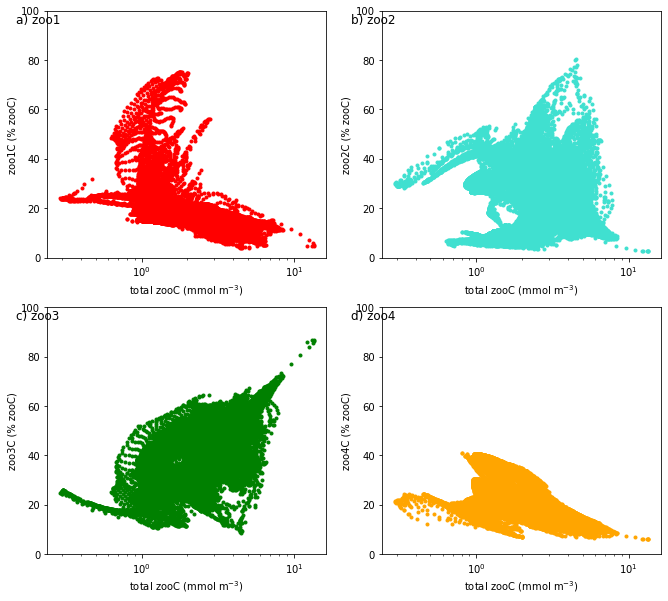

In [23]:
fig = plt.figure(figsize=(11,10))

ax = fig.add_subplot(2,2,1)
#plt.title('spChl vs total Chl')
ax.set_xlabel('total zooC (mmol m$^{-3}$)')
ax.set_ylabel('zoo1C (% zooC)')
ax.scatter(tot_zoo_vals, zoo1C_percent, color='red',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'a) zoo1',fontsize=12)

ax = fig.add_subplot(2,2,2)
#plt.title('coccoChl vs total Chl')
ax.set_xlabel('total zooC (mmol m$^{-3}$)')
ax.set_ylabel('zoo2C (% zooC)')
ax.scatter(tot_zoo_vals, zoo2C_percent, color='turquoise',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'b) zoo2',fontsize=12)

ax = fig.add_subplot(2,2,3)
#plt.title('diatChl vs total Chl')
ax.set_xlabel('total zooC (mmol m$^{-3}$)')
ax.set_ylabel('zoo3C (% zooC)')
ax.scatter(tot_zoo_vals, zoo3C_percent, color='green',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'c) zoo3',fontsize=12)

ax = fig.add_subplot(2,2,4)
#plt.title('diazChl vs total Chl')
ax.set_xlabel('total zooC (mmol m$^{-3}$)')
ax.set_ylabel('zoo4C (% zooC)')
ax.scatter(tot_zoo_vals, zoo4C_percent, color='orange',marker=".")
ax.set_ylim(0,100)
ax.set_xscale('log')
ax.text(0.15, 95, 'd) zoo4',fontsize=12);